In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import talib as ta
from trend_v1 import *
import copy as cp

<h3>First here, I tried to detect the turning points like last time I showed you</h3>

In [2]:
def data_collection(filename):
    Folder_data = '../Data/'
    data = pd.read_csv(Folder_data +filename)
    data.reset_index(drop=True, inplace=True)
    data.info()
    return data

In [3]:
def plot_pivots(data,pivots):
    plt.figure(figsize = (15,10))
    plt.xlim(0, len(data))
    plt.ylim(data.min()*0.99, data.max()*1.01)
    plt.plot(np.arange(len(data)), data, 'k:', alpha=0.5)
    plt.plot(np.arange(len(data))[pivots != 0], data[pivots != 0], 'k-')
    plt.scatter(np.arange(len(data))[pivots == 1], data[pivots == 1], color='g')
    plt.scatter(np.arange(len(data))[pivots == -1], data[pivots == -1], color='r')

In [5]:
EU_Build = data_collection('EU_H1_Build.csv')
EU_Build.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62399 entries, 0 to 62398
Data columns (total 6 columns):
Local time    62399 non-null object
Open          62399 non-null float64
High          62399 non-null float64
Low           62399 non-null float64
Close         62399 non-null float64
Volume        62399 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.9+ MB


,Local time,Open,High,Low,Close,Volume
62394,13.07.2018 18:00:00.000 GMT+0200,1.16665,1.16776,1.16653,1.16733,10647.7695
62395,13.07.2018 19:00:00.000 GMT+0200,1.16733,1.16755,1.16660,1.16755,9190.4004
62396,13.07.2018 20:00:00.000 GMT+0200,1.16756,1.16828,1.16739,1.16767,7812.7700
62397,13.07.2018 21:00:00.000 GMT+0200,1.16768,1.16838,1.16757,1.16810,7784.0000
62398,13.07.2018 22:00:00.000 GMT+0200,1.16812,1.16868,1.16809,1.16843,4402.7002


In [6]:
EU_Build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62399 entries, 0 to 62398
Data columns (total 6 columns):
Local time    62399 non-null object
Open          62399 non-null float64
High          62399 non-null float64
Low           62399 non-null float64
Close         62399 non-null float64
Volume        62399 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.9+ MB


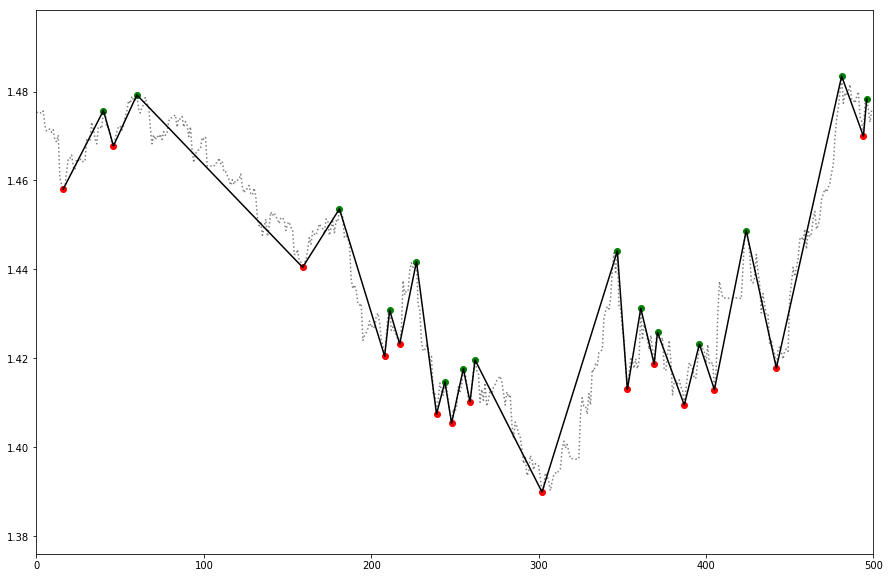

In [7]:
trend_build = trend_v1(EU_Build,0.005,-0.005) # 0.005 which means if there is a change of 50 pips, the trend is reversal.
first_pivot_build = trend_build.initial_pivot()
pivots_build = trend_build.peak_valley_pivots(first_pivot_build)
EU_Build['Pivots'] = pivots_build
plot_pivots(EU_Build['Close'][500:1000],EU_Build['Pivots'][500:1000])

In [8]:
trend_build.compute_segment_returns(pivots_build)

0        NaN
12       0.0
63       0.0
86       0.0
241      0.0
250      0.0
271      0.0
296      0.0
355      0.0
365      0.0
392      0.0
409      0.0
426      0.0
454      0.0
487      0.0
497      0.0
516      0.0
540      0.0
546      0.0
560      0.0
659      0.0
681      0.0
708      0.0
711      0.0
717      0.0
727      0.0
739      0.0
744      0.0
748      0.0
755      0.0
        ... 
61256    0.0
61335    0.0
61382    0.0
61399    0.0
61449    0.0
61475    0.0
61507    0.0
61531    0.0
61558    0.0
61567    0.0
61612    0.0
61642    0.0
61647    0.0
61693    0.0
61718    0.0
61766    0.0
61788    0.0
61808    0.0
61856    0.0
61882    0.0
61898    0.0
61949    0.0
62002    0.0
62068    0.0
62120    0.0
62158    0.0
62178    0.0
62293    0.0
62388    0.0
62398    NaN
Name: Close, Length: 1894, dtype: float64

<h3>Here I calculate some indicators: CCI and RSI</h3>

In [9]:
CCI_build = ta.CCI(EU_Build['High'], EU_Build['Low'], EU_Build['Close'], timeperiod=14)
RSI_build = ta.RSI(EU_Build['Close'], timeperiod=14)
EU_Build['CCI'] = CCI_build
EU_Build['RSI'] = RSI_build

In [10]:
df_build = EU_Build.where(EU_Build['Pivots']!=0)
df_build = df_build.dropna()
df_build = df_build.reset_index(drop=True)

d_H1_build = np.zeros(len(df_build['Close']))

for i in range(1,len(df_build['Close'])):
    d_H1_build[i] = df_build['Close'][i] - df_build['Close'][i-1]
    
#Distance is the amount of change between 2 Pivots points
df_build['Distance'] = d_H1_build
df_build.head(5)

,Local time,Open,High,Low,Close,Volume,Pivots,CCI,RSI,Distance
0,30.07.2008 15:00:00.000 GMT+0200,1.55492,1.55550,1.55183,1.55386,39627.9961,-1.0,-267.842682,30.108848,0.00000
1,31.07.2008 14:00:00.000 GMT+0200,1.56108,1.56842,1.55996,1.56761,40775.8945,1.0,182.893143,72.292200,0.01375
2,11.08.2008 01:00:00.000 GMT+0200,1.49516,1.49654,1.49189,1.49321,12670.9971,-1.0,-145.339757,14.451766,-0.07440
3,11.08.2008 10:00:00.000 GMT+0200,1.50320,1.50835,1.50250,1.50758,46006.3945,1.0,215.591993,54.477264,0.01437
4,12.08.2008 07:00:00.000 GMT+0200,1.48806,1.48908,1.48188,1.48292,28809.9004,-1.0,-206.553208,28.125896,-0.02466


<h3>Now I would like generate a new dataframe, whhich include the change between last pivots points and the strength in indicators CCI and RSI at that point. Based on the previous change, I will predict how much change will happen in the next move </h3>

In [47]:
Slide_data = df_build[["CCI","RSI","Distance"]]
Slide_data.head(5)

,CCI,RSI,Distance
0,-267.842682,30.108848,0.00000
1,182.893143,72.292200,0.01375
2,-145.339757,14.451766,-0.07440
3,215.591993,54.477264,0.01437
4,-206.553208,28.125896,-0.02466


<h3>Here I created a function window, which I consider window of 5 last elements in data to predict the next one</h3>

In [4]:
class WindowSlider(object):    
    def __init__(self, window_size):        
        self.w = window_size
        self.r = 1       
        self.l = 0
        self.p = 0
        self.names = []              
    def collect_windows(self, X):
        cols = len(list(X)) - 1
        N = len(X)
        self.l = N - self.w
        self.p = cols * self.w + 1
        x = cp.deepcopy(X)       
        for j, col in enumerate(list(x)):                        
            for i in range(self.w):               
                name = col + ('(%d)' % (i+1))
                self.names.append(name)          
        self.names.append('Y')

        df = pd.DataFrame(np.zeros(shape=(self.l,len(self.names))), columns=self.names)
        
        for i in range(self.l):
            slices = np.array([])
            for k in range(len(list(X))):
                line = X.values[i:self.w + i, k]
                slices = np.concatenate((slices, line))
            y = np.array(X.values[self.w + i + self.r - 1, -1]).reshape(1,)
            slices = np.concatenate((slices,y)) 
            df.iloc[i,:] = slices 
        return df

In [12]:
train_set = Slide_data[:1500]
test_set = Slide_data[1500:]

<h3>The table below is showed how the window works. They will consider all 5 last elements to predict the next change. Y is the distance would be in the next move </h3>

In [13]:
w = 5
train_win = WindowSlider(w)
train = train_win.collect_windows(train_set.iloc[:,0:])

test_win = WindowSlider(w)
test = test_win.collect_windows(test_set.iloc[:,0:])

train.head(5)

,CCI(1),CCI(2),CCI(3),CCI(4),CCI(5),RSI(1),RSI(2),RSI(3),RSI(4),RSI(5),Distance(1),Distance(2),Distance(3),Distance(4),Distance(5),Y
0,-267.842682,182.893143,-145.339757,215.591993,-206.553208,30.108848,72.292200,14.451766,54.477264,28.125896,0.00000,0.01375,-0.07440,0.01437,-0.02466,0.01145
1,182.893143,-145.339757,215.591993,-206.553208,155.503452,72.292200,14.451766,54.477264,28.125896,55.929682,0.01375,-0.07440,0.01437,-0.02466,0.01145,-0.02814
2,-145.339757,215.591993,-206.553208,155.503452,-142.079980,14.451766,54.477264,28.125896,55.929682,27.553291,-0.07440,0.01437,-0.02466,0.01145,-0.02814,0.00987
3,215.591993,-206.553208,155.503452,-142.079980,252.233677,54.477264,28.125896,55.929682,27.553291,59.678376,0.01437,-0.02466,0.01145,-0.02814,0.00987,-0.01142
4,-206.553208,155.503452,-142.079980,252.233677,-218.807523,28.125896,55.929682,27.553291,59.678376,33.207654,-0.02466,0.01145,-0.02814,0.00987,-0.01142,0.01446


In [14]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train.iloc[:,:-1], train.iloc[:,-1])

lr_y = test['Y'].values
lr_y_fit = lr_model.predict(train.iloc[:,:-1])
lr_y_pred = lr_model.predict(test.iloc[:,:-1])

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

results = pd.DataFrame()
results['Test'] = lr_y.tolist()
results['Predict'] = lr_y_pred.tolist()


RMSE = 0.01


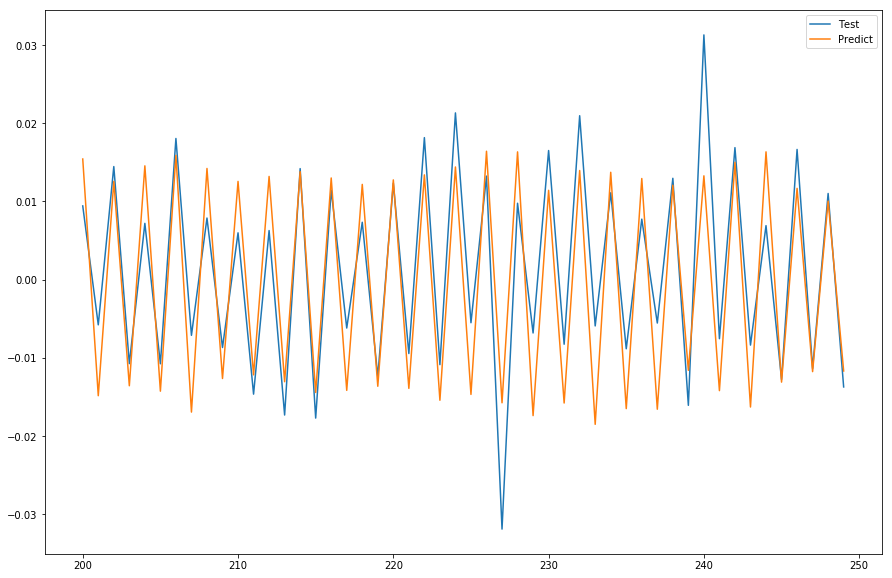

In [50]:
plt.figure(figsize = (15,10))
plt.plot(results['Test'][200:250])
plt.plot(results['Predict'][200:250])
plt.legend()

<h3>Overview: </h3><br>
    1. As can we see from the chart, the predicted distance run by SVR fluctuate in range from -0.015-0.015, which is 150 Percentage in point(pips) in price. 
<br><br>
    2. Some extremely high move, which is more than 300 pips, the model cannot detect.
<br><br>
    3. There are still some points, the model can predict quite correctly.<br>
    
<h3>Analysis: </h3><br>
    1. By my experience, in 1-Hour timeframe, it is recommended that a wave could last for 100-150 pips. In this model, they also shown the fluctuation of the model also in 150 pips, and they cannot detect the extremly high or small move of the market.
    Thus, I feel this model is not really work as I expect.
<br> <br>   
    2. I tried to change the window size from 2 to 10 and higher, and the window = 5 is the most reasonable. 
    

<h4>
Therefore, instead of applying sliding window and SVR in the dataframe to predict the change of next move, I tried to apply directly into the original data, to predict the next Close price to see what happend.
    <br>
I created a new dataframe, which is just included the Close price and indicators values
</h4>

In [48]:
new_dataframe_H1 = EU_Build[['RSI','CCI','Close']]
new_train_set_H1 = new_dataframe_H1[:50000]
new_test_set_H1 = new_dataframe_H1[50000:]
w = 5
train_constructor_H1 = WindowSlider(w)
new_train_windows_H1 = train_constructor_H1.collect_windows(new_train_set_H1.iloc[:,0:])
new_train_windows_H1.dropna(inplace=True)
new_train_windows_H1.reset_index()

test_constructor_H1 = WindowSlider(w)
test_windows_H1 = test_constructor_H1.collect_windows(new_test_set_H1.iloc[:,0:])

new_train_windows_H1.head(6)

,RSI(1),RSI(2),RSI(3),RSI(4),RSI(5),CCI(1),CCI(2),CCI(3),CCI(4),CCI(5),Close(1),Close(2),Close(3),Close(4),Close(5),Y
14,76.164875,64.259130,63.922856,66.385558,69.543093,122.720977,84.214268,24.993208,66.477729,76.049898,1.57552,1.57360,1.57354,1.57432,1.57542,1.57418
15,64.259130,63.922856,66.385558,69.543093,62.424546,84.214268,24.993208,66.477729,76.049898,58.636397,1.57360,1.57354,1.57432,1.57542,1.57418,1.57471
16,63.922856,66.385558,69.543093,62.424546,64.115319,24.993208,66.477729,76.049898,58.636397,44.247693,1.57354,1.57432,1.57542,1.57418,1.57471,1.57406
17,66.385558,69.543093,62.424546,64.115319,60.518712,66.477729,76.049898,58.636397,44.247693,28.253671,1.57432,1.57542,1.57418,1.57471,1.57406,1.57404
18,69.543093,62.424546,64.115319,60.518712,60.406429,76.049898,58.636397,44.247693,28.253671,-5.536434,1.57542,1.57418,1.57471,1.57406,1.57404,1.57373
19,62.424546,64.115319,60.518712,60.406429,58.591835,58.636397,44.247693,28.253671,-5.536434,-33.394495,1.57418,1.57471,1.57406,1.57404,1.57373,1.57364


RMSE = 0.00


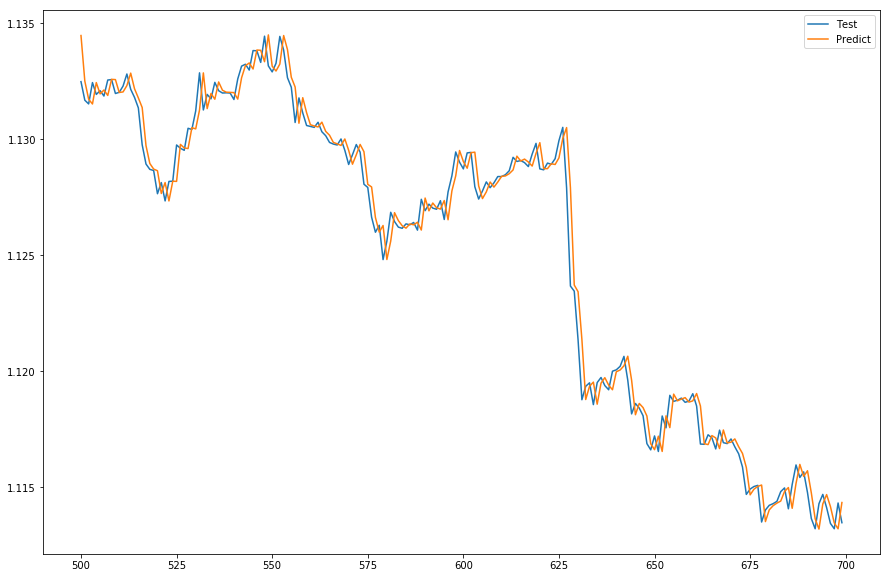

In [51]:
new_lr_model_H1 = LinearRegression()
new_lr_model_H1.fit(new_train_windows_H1.iloc[:,:-1], new_train_windows_H1.iloc[:,-1])

new_lr_y_H1 = test_windows_H1['Y'].values
new_lr_y_fit_H1 = new_lr_model_H1.predict(new_train_windows_H1.iloc[:,:-1])
new_lr_y_pred_H1 = new_lr_model_H1.predict(test_windows_H1.iloc[:,:-1])
np.round(new_lr_y_pred_H1,5)

new_lr_residuals_H1 = new_lr_y_pred_H1 - new_lr_y_H1
new_lr_rmse_H1 = np.sqrt(np.sum(np.power(new_lr_residuals_H1,2)) / len(new_lr_residuals_H1))
print('RMSE = %.2f' % new_lr_rmse_H1)

new_results_H1 = pd.DataFrame()
new_results_H1['Test'] = new_lr_y_H1.tolist()
new_results_H1['Predict'] = new_lr_y_pred_H1.tolist()

plt.figure(figsize = (15,10))
plt.plot(new_results_H1['Test'][500:700])
plt.plot(new_results_H1['Predict'][500:700])
plt.legend()

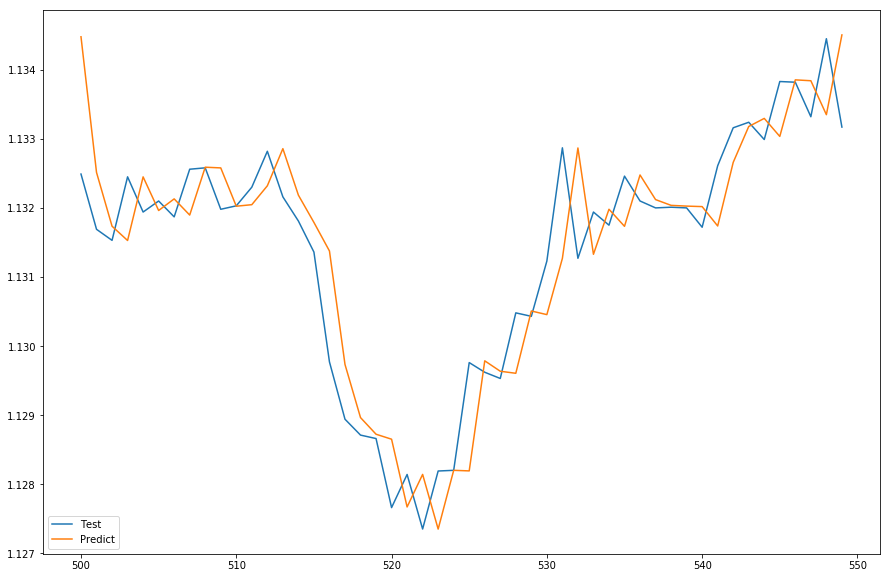

In [52]:
plt.figure(figsize = (15,10))
plt.plot(new_results_H1['Test'][500:550])
plt.plot(new_results_H1['Predict'][500:550])
plt.legend()

<h4>To me, i feel the results in this test is very similar to LSTM, They seem catch the same direction, but in fact there is a huge delay in result, which could lead to a bad trading!</h4>

<h3>
In a nutshell:
</h3>
<br>
1. In this approach way, when I used the turning point to dectect the trend, I set a threshold value is 0.005, which is 50 pips. It means, after a change in a direction of 50 pips, it confirms reversal trend. So the model actually cannot detect the turning point in real time. They would have a delay after 50 pips. In a big move of 150-300 pips, it is still acceptable, but in a short move of 70-100 pips, this delay would make the orders become less profitable. On the otherhand, in a short move, when the market reverses, the model also will get some delay time to detect it! The threshold value is also a recommended value in real trading, and when I tried to reduce the value, I got much noisy data.
<br>
<br>
2. In the first approach, we faced to a constant move of the model, and they cannot detect the extremly high or low. The constant returned is also widely recommended in trading world, thus it is quite excessive.
<br>
<br>
3. In the second approach, we faced to a delay in return price. At some point you can see, the market has already reversed, but the predicted price is still going to the peak.


<h4> Stragetry:</h4>

Below, I tried to do a stragety for the first approach, by using the **Sliding window**, **Turning points** and **SVR**. To reduce the effect of the delay, and to obtain the best signal. In my exp, even when we detect the peak points, I will go to check the value of indicators, and in this time, it is CCI.

The Strong reversed point is the point that has the CCI value high than 180 ( Sell point), or lower than -180 (Buy point). Other Peak points, which have the CCI values from 180 to -180 are just the consolidation in a big trend.

The code is not finished yet.

In [16]:
EU_Trade = data_collection('EU_H1_Trade.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12623 entries, 0 to 12622
Data columns (total 6 columns):
Local time    12623 non-null object
Open          12623 non-null float64
High          12623 non-null float64
Low           12623 non-null float64
Close         12623 non-null float64
Volume        12623 non-null float64
dtypes: float64(5), object(1)
memory usage: 591.8+ KB


In [17]:
data_trade = EU_Trade[200:3000]
data_trade.reset_index(inplace=True,drop = True)
data_trade.head(5)

,Local time,Open,High,Low,Close,Volume
0,25.07.2018 08:00:00.000 GMT+0200,1.16873,1.16996,1.16809,1.16986,13080.5498
1,25.07.2018 09:00:00.000 GMT+0200,1.16984,1.16987,1.16845,1.16899,11223.8896
2,25.07.2018 10:00:00.000 GMT+0200,1.16900,1.16970,1.16806,1.16961,14089.8799
3,25.07.2018 11:00:00.000 GMT+0200,1.16960,1.17050,1.16948,1.17038,13244.7100
4,25.07.2018 12:00:00.000 GMT+0200,1.17038,1.17050,1.16894,1.16925,11865.0596


In [39]:
data_trade['Close'][3]

1.16695

C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


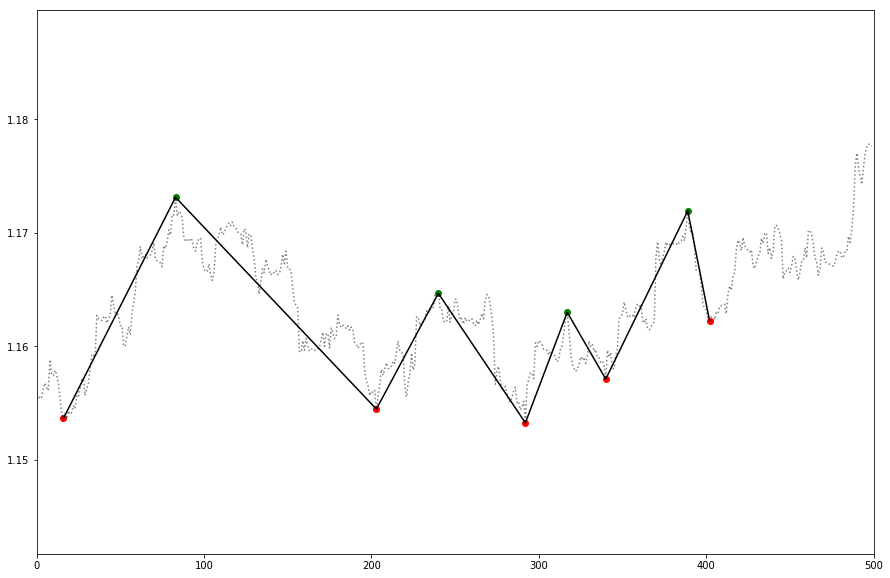

In [18]:
trend_trade = trend_v1(data_trade,0.005,-0.005)
first_pivot_trade = trend_trade.initial_pivot()
pivots_trade = trend_trade.peak_valley_pivots(first_pivot_trade)
data_trade['Pivots'] = pivots_trade
plot_pivots(data_trade['Close'][500:1000],data_trade['Pivots'][500:1000])

In [19]:
Pivots_position = pd.DataFrame(trend_trade.compute_segment_returns(pivots_trade))
#Pivots_position.index.item()

In [20]:
CCI_trade = ta.CCI(data_trade['High'], data_trade['Low'], data_trade['Close'], timeperiod=14)
RSI_trade = ta.RSI(data_trade['Close'], timeperiod=14)
data_trade['CCI'] = CCI_trade
data_trade['RSI'] = RSI_trade

C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
df_trade = data_trade.where(data_trade['Pivots']!=0)
df_trade = df_trade.dropna()
df_trade = df_trade.reset_index(drop=True)

d_H1_trade = np.zeros(len(df_trade['Close']))

for i in range(1,len(df_trade['Close'])):
    d_H1_trade[i] = df_trade['Close'][i] - df_trade['Close'][i-1]

df_trade['Distance'] = d_H1_trade

In [22]:
df_trade.tail(5)

,Local time,Open,High,Low,Close,Volume,Pivots,CCI,RSI,Distance
54,24.12.2018 15:00:00.000 GMT+0100,1.14138,1.14384,1.14134,1.14275,37199.1914,1.0,217.657531,62.833152,0.00688
55,26.12.2018 22:00:00.000 GMT+0100,1.13536,1.13549,1.13484,1.13507,7949.0898,-1.0,-125.332346,31.169237,-0.00768
56,02.01.2019 07:00:00.000 GMT+0100,1.14779,1.14967,1.14769,1.14852,14774.0098,1.0,235.642300,72.652817,0.01345
57,03.01.2019 00:00:00.000 GMT+0100,1.13359,1.13513,1.13092,1.13121,14816.8398,-1.0,-88.444465,20.198005,-0.01731
58,03.01.2019 23:00:00.000 GMT+0100,1.13924,1.13985,1.13865,1.13931,4234.3799,-1.0,47.006816,55.075787,0.00810


In [23]:
df_trade['CCI'].iloc[-2] +10

-78.44446471464812

In [24]:
df_trade['Close'][57]

1.13121

In [25]:
w = 5
predict_win = WindowSlider(w)
last = df_trade[["CCI","RSI","Distance"]].tail(6)
#last.reset_index(inplace = True,drop = True)
last.tail(5)

,CCI,RSI,Distance
54,217.657531,62.833152,0.00688
55,-125.332346,31.169237,-0.00768
56,235.642300,72.652817,0.01345
57,-88.444465,20.198005,-0.01731
58,47.006816,55.075787,0.00810


In [26]:
predict_set = predict_win.collect_windows(last.iloc[:,0:])
lr_y_pred = lr_model.predict(predict_set.iloc[:,:-1])

In [46]:
data_trade['Close'][5] < data_trade['Close'][3]+lr_y_pred[0]

True

In [28]:
Balance = 100000
Trade_order = 0
Take_profit_point = 0
Stop_loss_point = 0
Enter_price = 0
last_pivots_price = 0

In [41]:
w = 5
predict_win = WindowSlider(w)
for i in range(1001,3000):
    data_trade = EU_Trade[i-1000:i]
    data_trade.reset_index(inplace=True,drop=True)
    trend_trade = trend_v1(data_trade,0.005,-0.005)
    first_pivot_trade = trend_trade.initial_pivot()
    pivots_trade = trend_trade.peak_valley_pivots(first_pivot_trade)
    data_trade['Pivots'] = pivots_trade
    CCI_trade = ta.CCI(data_trade['High'], data_trade['Low'], data_trade['Close'], timeperiod=14)
    RSI_trade = ta.RSI(data_trade['Close'], timeperiod=14)
    data_trade['CCI'] = CCI_trade
    data_trade['RSI'] = RSI_trade
    
    df_trade = data_trade.where(data_trade['Pivots']!=0)
    df_trade = df_trade.dropna()
    df_trade = df_trade.reset_index(drop=True)
    d_H1_trade = np.zeros(len(df_trade['Close']))
    for i in range(1,len(df_trade['Close'])):
        d_H1_trade[i] = df_trade['Close'][i] - df_trade['Close'][i-1]
    df_trade['Distance'] = d_H1_trade
    if (df_trade['CCI'].iloc[-2] > 180) or (df_trade['CCI'].iloc[-2] < -180):
            predict_set = df_build[["CCI","RSI","Distance"]].tail(w+1)   
            predict_set = predict_win.collect_windows(predict_set.iloc[:,0:])
            pred_distance = lr_model.predict(test.iloc[:,:-1])
             
    if Trade_order == 0:
        if df_trade['CCI'].iloc[-2] > 180:
            Trade_order = -1
            Enter_price = data_trade['Close'][i]
            Stop_loss_point = df_trade['Close'].iloc[-2] + 0.002
            Loss_d = df_trade['Close'].iloc[-2] - data_trade['Close'][i]
            Take_profit_point = data_trade['Close'][i] + pred_distance[0]
            Profit_d = -pred_distance
            
        elif df_trade['CCI'].iloc[-2] < -180:
            Trade_order = 1
            Enter_price = data_trade['Close'][i]
            Stop_loss_point = df_trade['Close'].iloc[-2] - 0.002 
            Loss_d = df_trade['Close'].iloc[-2] - data_trade['Close'][i]
            Take_profit_point= data_trade['Close'][i] + pred_distance[0]
            Profit_d = pred_distance
            
    if Trade_order == 1:
        if data_trade['High'][i] >= Take_profit_point:
            Order_exit = Profit_d
            Trade_order = 0
        elif data_trade['Low'][i] <= Stop_loss_point:
            Order_exit = Loss_d
            Trade_order = 0
    if Trade_order == -1:
        if data_trade['Low'][i] <= Take_profit_point:
            Order_exit = Profit_d
            Trade_order = 0
        elif data_trade['High'][i] >= Stop_loss_point:
            Order_exit = Loss_d
            Trade_order = 0

    

C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\DarkCoM\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()